In [1]:
import numpy as np
from Hopfield import Hopfield
from utils.activation_functions import sgn

NUMBER_NEURONS = 50

hopfiled_network = Hopfield(activation_function=sgn, n_neurons=NUMBER_NEURONS)

stored_pattern_A = np.random.choice([1, -1], size=NUMBER_NEURONS)
stored_pattern_B = np.random.choice([1, -1], size=NUMBER_NEURONS)
stored_patterns = np.array([stored_pattern_A, stored_pattern_B])

In [2]:
hopfiled_network.bind(stored_patterns)

In [3]:
print(hopfiled_network.W)

[[ 0. -2.  2. ...  2.  0.  0.]
 [-2.  0. -2. ... -2.  0.  0.]
 [ 2. -2.  0. ...  2.  0.  0.]
 ...
 [ 2. -2.  2. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]
 [ 0.  0.  0. ...  0. -2.  0.]]


In [4]:
def add_noise(pattern, noise_level=0.25):
    """Flip a fraction of bits in the pattern."""
    noisy = pattern.copy()
    n_flips = int(noise_level * len(pattern))
    flip_indices = np.random.choice(len(pattern), n_flips, replace=False)
    noisy[flip_indices] *= -1
    return noisy
test_A_noisy = add_noise(stored_pattern_A)
test_B_noisy = add_noise(stored_pattern_B)

retrieved_A, closest_A = hopfiled_network.retrieve(test_A_noisy, synchrous=True, n_iterations=10)
retrieved_B, closest_B = hopfiled_network.retrieve(test_B_noisy, synchrous=True, n_iterations=10)

print("\nSynchronous Retrieval Results:")
print("Retrieved A:", retrieved_A)
print("Closest stored pattern to A:", closest_A)
print("Retrieved B:", retrieved_B)
print("Closest stored pattern to B:", closest_B)

[0.9999999999999999, -0.07999999999999999]
[-0.07999999999999999, 0.9999999999999999]

Synchronous Retrieval Results:
Retrieved A: [ 1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1]
Closest stored pattern to A: [ 1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1
  1 -1]
Retrieved B: [-1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1
  1 -1]
Closest stored pattern to B: [-1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1
  1 -1]


In [6]:
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("fashion_mnist", split = "test").shuffle(seed = 999)


(10000, 2)


<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x306FC49B0>


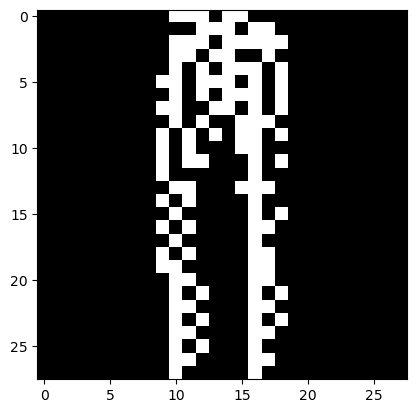

In [59]:
import matplotlib.pyplot as plt
print(dataset[0]['image'])
plt.imshow(dataset[5]['image'].convert("1"))
plt.show()

In [60]:
stored_patterns = dataset[:5]['image']
stored_patterns_binary = []   # start as a Python list

for pattern in stored_patterns:
    # convert PIL image to NumPy array of 0/1
    state = np.asarray(pattern.convert("1"), dtype=int)
    # map 0 → -1, 1 → +1
    state = state * 2 - 1
    # flatten to 1D vector
    state = state.flatten()
    stored_patterns_binary.append(state)

# finally convert to NumPy array if you want
stored_patterns_binary = np.array(stored_patterns_binary)


In [63]:
n_neurons = len(stored_patterns_binary[0])
hopfield_network = Hopfield(activation_function=sgn, n_neurons=n_neurons)


In [64]:
print(hopfield_network.W)
hopfield_network.bind(stored_patterns_binary)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
print(hopfield_network.W)

[[0. 5. 5. ... 5. 5. 5.]
 [5. 0. 5. ... 5. 5. 5.]
 [5. 5. 0. ... 5. 5. 5.]
 ...
 [5. 5. 5. ... 0. 5. 5.]
 [5. 5. 5. ... 5. 0. 5.]
 [5. 5. 5. ... 5. 5. 0.]]


In [66]:
sample_test = stored_patterns_binary[0]
sample_test_noisy = add_noise(sample_test, noise_level=0.3)
print("Sample Test: ", sample_test)
print("Sample Test after adding noise: ", sample_test_noisy)

Sample Test:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1 

In [67]:
from utils.metrics import similarity
retrieved_state, closest_state = hopfield_network.retrieve(sample_test_noisy, synchrous=True, n_iterations=100) # synchrous iterations converge quicker than asynchrous
print(similarity(closest_state, sample_test))
print(similarity(retrieved_state, sample_test))


[0.9132653061224489, 0.1913265306122449, 0.5153061224489796, 0.5816326530612245, 0.4489795918367347]
1.0
0.9132653061224489


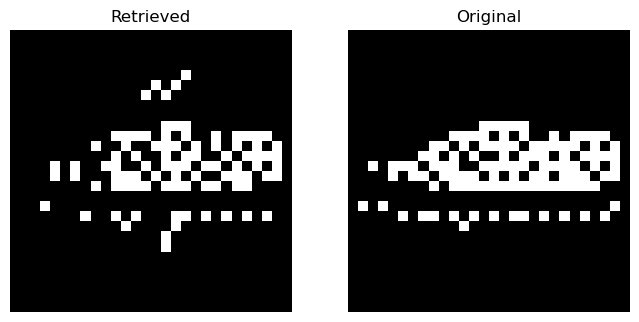

In [68]:
import matplotlib.pyplot as plt

# reshape states to 28x28
img_retrieved = retrieved_state.reshape(28, 28)
img_original = closest_state.reshape(28, 28)

# create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# left: retrieved pattern
axes[0].imshow(img_retrieved, cmap='gray', vmin=-1, vmax=1)
axes[0].set_title("Retrieved")
axes[0].axis('off')

# right: closest stored pattern
axes[1].imshow(img_original, cmap='gray', vmin=-1, vmax=1)
axes[1].set_title("Original")
axes[1].axis('off')

plt.show()